In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()

Welcome to JupyROOT 6.22/06


In [2]:
def plot(range_list, FOM, var):
    fig = plt.figure(figsize=(8, 6))   
    ax0 = fig.add_subplot(1,1,1)
    plt.plot(range_list, FOM, color='b', label="S/sqrt(B)")
    ax0.set_ylabel("S/sqrt(B)")
    ax0.set_xlabel(f"cut on {var}")
    handles, labels = ax0.get_legend_handles_labels()
    ax0.legend(handles, labels)
    fig.show()
    fig.savefig(f"opt_{var}.png")

In [3]:
def Optimization(sig_df, bkg_df, var, istart, iend, istep, direction):
    print("Optimizing on: ", var)
    N_sig = []
    N_bkg = []
    range_list = np.arange(istart, iend, istep)
    for ipoint in range_list:
        if direction > 0 :
            N_sig.append(sum(sig_df[var] > ipoint))
            N_bkg.append(sum(bkg_df[var] > ipoint))
        elif direction < 0 :
            N_sig.append(sum(sig_df[var] < ipoint))
            N_bkg.append(sum(bkg_df[var] < ipoint))
        elif direction == 0:
            N_sig.append(sum((sig_df[var] < ipoint) & (sig_df[var] > ipoint*-1)))
            N_bkg.append(sum((bkg_df[var] < ipoint) & (bkg_df[var] > ipoint*-1)))
            
    FOM = np.array(N_sig) / np.sqrt(np.array(N_bkg)+1)
    best_cut = range_list[np.argmax(FOM)]
    print(np.max(FOM), best_cut)
    
    # Get df after the cut
    if direction > 0 :
        sig_df_cut = sig_df[sig_df[var] > best_cut]
        bkg_df_cut = bkg_df[bkg_df[var] > best_cut]
    elif direction < 0 :
        sig_df_cut = sig_df[sig_df[var] < best_cut]
        bkg_df_cut = bkg_df[bkg_df[var] < best_cut]
    elif direction == 0:
        sig_df_cut = sig_df[(sig_df[var] < best_cut) & (sig_df[var] > best_cut*-1)]
        bkg_df_cut = bkg_df[(bkg_df[var] < best_cut) & (bkg_df[var] > best_cut*-1)]
        
    plot(range_list, FOM, var)
    
    return sig_df_cut, bkg_df_cut, np.max(FOM), best_cut

164320 28264
Optimizing on:  dijet_eta
88.71392489065033 1.2000000000000002
Optimizing on:  dR_jj
108.21244525463418 2.3000000000000003
Optimizing on:  dPhi_jj
108.21244525463418 2.3000000000000003
Optimizing on:  dPhi_jj
126.82917633159443 0.8
Optimizing on:  jet_ptoverm_0
132.3798668954727 0.75
Optimizing on:  jet_ptoverm_1
132.3798668954727 0.0
Optimizing on:  jet_ptoverm_2
135.08324134108 0.8
Optimizing on:  dR_jj_j
136.67330132882975 2.899999999999997
Optimizing on:  jet_ptoverM_2
139.6343965986692 0.275
Optimizing on:  dijet_ptoverM
140.55419356783165 0.275
Sample: Res1ToRes2GluTo3Glu_M1-7000_R-0p3
FOM with not cut: 69.72498207678916
var: dijet_eta, maxFOM: 88.71392489065033, best cut: 1.2000000000000002
var: dR_jj, maxFOM: 108.21244525463418, best cut: 2.3000000000000003
var: dPhi_jj_v1, maxFOM: 108.21244525463418, best cut: 2.3000000000000003
var: dPhi_jj_v2, maxFOM: 126.82917633159443, best cut: 0.8
var: jet_ptoverm_0, maxFOM: 132.3798668954727, best cut: 0.75
var: jet_ptoverm

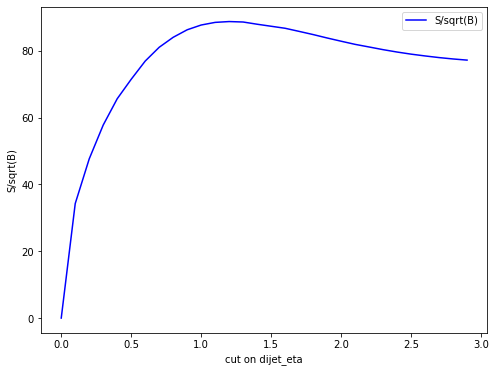

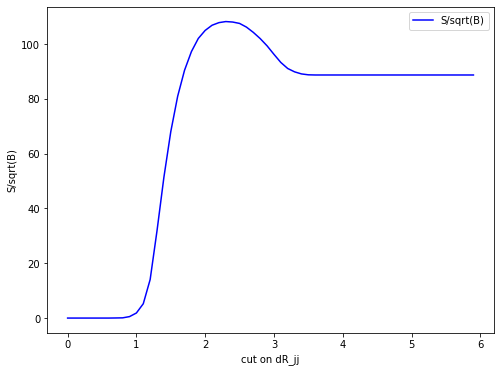

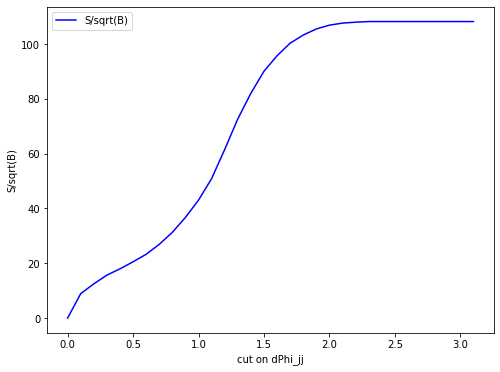

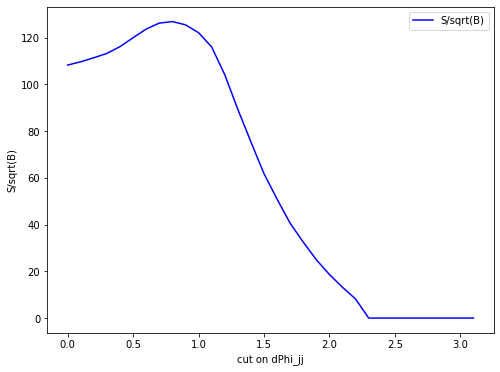

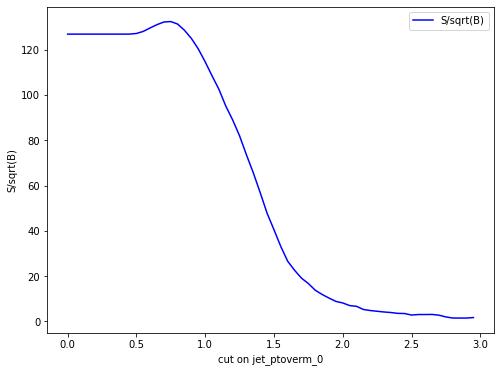

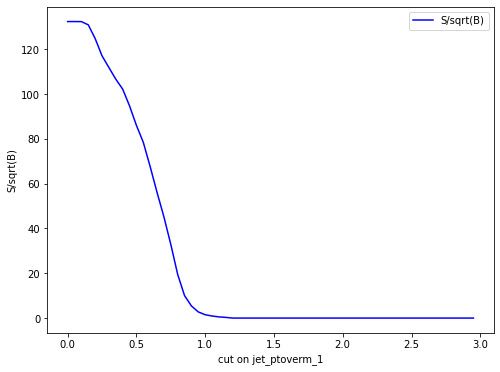

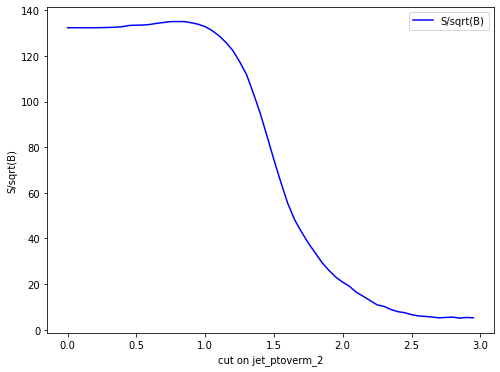

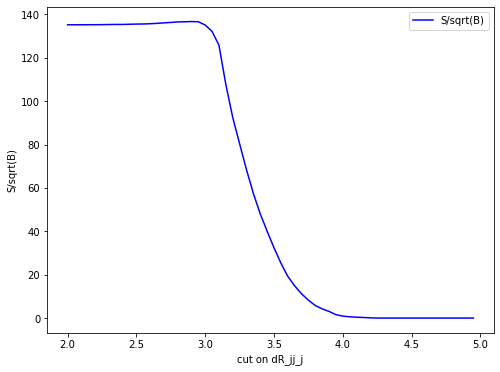

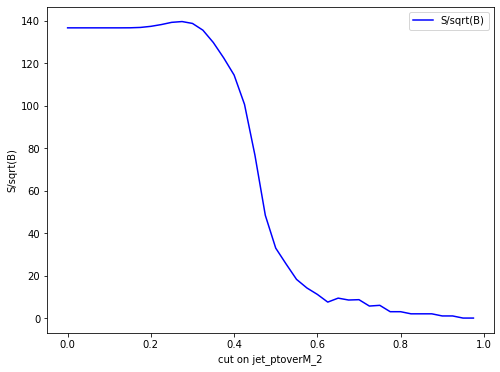

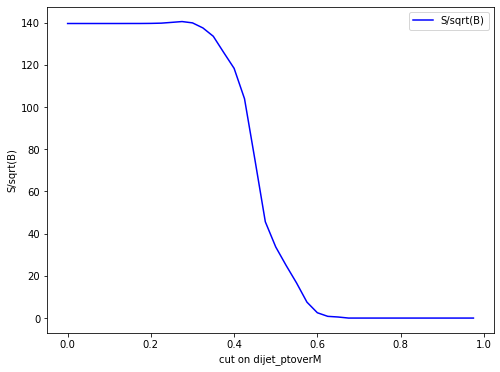

In [6]:
variable2use = {}
variable2use["dijet_eta"]     = {"start": 0.0, "end": 3.0, "step": 0.1, "direction": 0}
variable2use["dR_jj"]         = {"start": 0.0, "end": 6.0, "step": 0.1, "direction": -1}
variable2use["dPhi_jj_v1"]    = {"start": 0.0, "end": 3.2, "step": 0.1, "direction": -1}
variable2use["dPhi_jj_v2"]    = {"start": 0.0, "end": 3.2, "step": 0.1, "direction": 1}
variable2use["jet_ptoverm_0"] = {"start": 0.0, "end": 3.0, "step": 0.05, "direction": 1}
variable2use["jet_ptoverm_1"] = {"start": 0.0, "end": 3.0, "step": 0.05, "direction": 1}
variable2use["jet_ptoverm_2"] = {"start": 0.0, "end": 3.0, "step": 0.05, "direction": 1}
variable2use["dR_jj_j"]       = {"start": 2.0, "end": 5.0, "step": 0.05, "direction": 1}
variable2use["jet_ptoverM_2"] = {"start": 0.0, "end": 1.0, "step": 0.025, "direction": 1}
variable2use["dijet_ptoverM"] = {"start": 0.0, "end": 1.0, "step": 0.025, "direction": 1}

hist_dic = {}
file_list = []
QCD_sample = "QCD"
Sig_sample = "Res1ToRes2GluTo3Glu_M1-7000_R-0p3"

file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/benchmark_selection/samples_100pb_skimmed/{QCD_sample}_filtered_100pbinv.root")
file_list.append(file)
bkg_tree = file_list[0].Get("Events")
file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/benchmark_selection/samples_100pb_skimmed/{Sig_sample}_filtered_match3-0.root")
file_list.append(file)
sig_tree = file_list[1].Get("Events")

print(bkg_tree.GetEntries(), sig_tree.GetEntries())

sig_data, columns = sig_tree.AsMatrix(return_labels=True)
sig_df = pd.DataFrame(data=sig_data, columns=columns)
bkg_data, columns = bkg_tree.AsMatrix(return_labels=True)
bkg_df = pd.DataFrame(data=bkg_data, columns=columns)

# Pre-selection
# Signal
jet_eta_0_mask = (sig_df["jet_eta_0"] < 2.5) & (sig_df["jet_eta_0"] > -2.5)
jet_eta_1_mask = (sig_df["jet_eta_1"] < 2.5) & (sig_df["jet_eta_1"] > -2.5)
jet_eta_2_mask = (sig_df["jet_eta_2"] < 2.5) & (sig_df["jet_eta_2"] > -2.5)
dEta_jj_mask = sig_df["dEta_jj"] < 1.7
sig_df = sig_df[jet_eta_0_mask & jet_eta_1_mask & jet_eta_2_mask & dEta_jj_mask]
# QCD
jet_eta_0_mask = (bkg_df["jet_eta_0"] < 2.5) & (bkg_df["jet_eta_0"] > -2.5)
jet_eta_1_mask = (bkg_df["jet_eta_1"] < 2.5) & (bkg_df["jet_eta_1"] > -2.5)
jet_eta_2_mask = (bkg_df["jet_eta_2"] < 2.5) & (bkg_df["jet_eta_2"] > -2.5)
dEta_jj_mask = bkg_df["dEta_jj"] < 1.7
bkg_df = bkg_df[jet_eta_0_mask & jet_eta_1_mask & jet_eta_2_mask & dEta_jj_mask]

FOM_list = []
bestcut_list = []
for var_name in variable2use.keys():
    var = ""
    if "_v" in var_name:
        var = var_name.split("_v")[0]
    else:
        var = var_name
    sig_df, bkg_df, maxFOM, best_cut = Optimization(sig_df, bkg_df, var, 
                                                    variable2use[var_name]["start"], variable2use[var_name]["end"], variable2use[var_name]["step"], 
                                                    variable2use[var_name]["direction"])
    FOM_list.append(maxFOM)
    bestcut_list.append(best_cut)
    
print(f"Sample: {Sig_sample}")
print(f"FOM with not cut: {sig_tree.GetEntries() / math.sqrt(bkg_tree.GetEntries())}")
for i, var in enumerate(variable2use.keys()):
    print(f"var: {var}, maxFOM: {FOM_list[i]}, best cut: {bestcut_list[i]}")

  